In [220]:
import pandas as pd
import seaborn as sns
from functools import partial
import numpy as np


def getP(row, eps) :
    r = row["r"]
    return row[f"P_{r}_{eps}"]

def prob_unif_data(data, eps, pnscol):
    a = data[pnscol].apply(min)
    b = data[pnscol].apply(max)
    n = data[pnscol].apply(len)
    L = b - a
    
    num = (1 + (1 + 2*eps)**(2 - n) - 2 * (1+ eps) ** (2-n)) 
    den = (1 - L ** (n - 2) - (n - 2) * (1 - L) * L ** (n - 2))
    return num/den


def load(file, eps,llratio, pnscol, duplicate, fix, maxR):
    dt = pd.read_pickle(file).copy()
    #dt = dt[np.abs(dt.pns_l_emcc - dt.pns_u_emcc) > 0.02].copy()
    dt["r"] = dt[pnscol].apply(len)
    dt['duplicate'] = duplicate
    dt["fix"] = fix
    dt["maxR"] = maxR
    dt["pnss"] = dt[pnscol].apply(lambda pns: pns.astype(float))
    dt["P"] = dt.apply(partial(getP, eps=eps), axis=1)
    dt["Punif"]=prob_unif_data(dt, eps, pnscol)
    dt["eps"] = str(eps)
    return dt[["modelFile", "r", "P", "duplicate", "fix", "pnss", "Punif", pnscol, "pns_l_emcc", "pns_u_emcc", "pns_l_ccve", "pns_u_ccve", "eps", "maxR"]]
    

# exploration ($r_{max}$)

In [221]:
data = pd.DataFrame([
    [True, True, 0.01, 0.98, "pns098", "s1d", "P_kl_1e8_s1d_100iter_fix098_diplicate_0.01.pickle"],
    [True, True, 0.05, 0.98,"pns098", "s1d", "P_kl_1e8_s1d_100iter_fix098_diplicate_0.05.pickle"],
    [True, True, 0.1, 0.98,"pns098",  "s1d", "P_kl_1e8_s1d_100iter_fix098_diplicate_0.1.pickle"],
    [False, True, 0.01, 0.98,"pns098", "s1b", "P_kl_1e8_s1d_100iter_fix098_0.01.pickle"],
    [False, True, 0.05, 0.98,"pns098", "s1b", "P_kl_1e8_s1d_100iter_fix098_0.05.pickle"],
    [False, True, 0.1, 0.98,"pns098", "s1b", "P_kl_1e8_s1d_100iter_fix098_0.1.pickle"],
], columns=['duplicate', "fix", "eps", "llratio","pnsCol", "dataset", "file"])

data = pd.DataFrame([
    [True, True, 0.1, 0.98, "pns", "s1d", "probabs/P50_0.1.pickle", "50"],
    [True, True, 0.1, 0.98, "pns", "s1d", "probabs/P100_0.1.pickle", "100"],
    [True, True, 0.1, 0.98, "pns", "s1d", "probabs/P150_0.1.pickle", "150"],
    [True, True, 0.1, 0.98, "pns", "s1d", "probabs/P200_0.1.pickle", "200"],
], columns=['duplicate', "fix", "eps", "llratio","pnsCol", "dataset", "file", "maxR"])



#d1 = load("P_kl_1e8_s1d_100iter_fix098_0.01.pickle", 0.01)
#d2 = load("P_kl_1e8_s1d_100iter_fix098_0.05.pickle", 0.05)
#d3 = load("P_kl_1e8_s1d_100iter_fix098_0.1.pickle", 0.1)

dt = pd.concat((
    load(d.file, d.eps, d.llratio, d.pnsCol, d.duplicate, d.fix, d.maxR).reset_index()
    for index, d in data.iterrows())).reset_index()

#dt = d1.merge(d2[["modelFile", "P0.05"]], on="modelFile").merge(d3[["modelFile", "P0.1"]], on="modelFile")

In [155]:
x = x.copy()

In [214]:
import convergence
from functools import partial
f = partial(convergence.fit_beta, eps=0.1, precision=0.000000001)

x = dt[dt["P"] > 1]

ab = x.pns.apply(partial(np.array, dtype=float)).apply(f)

In [228]:
dt["L"] = dt.pnss.apply(max) - dt.pnss.apply(min)

In [232]:
x.shape

(53, 17)

In [229]:
x = dt[dt.L > 1/3].copy()

In [231]:
sum(x.P > 1)

10

In [208]:
from ipywidgets import interact
import ipywidgets

@interact(i=ipywidgets.IntSlider(10, min=0, max=x.shape[0]-1))
def plt(i):
    sns.histplot(x.pns.iloc[i], bins=20)
    print(x.iloc[i].P, x.iloc[i].pns.min())

interactive(children=(IntSlider(value=10, description='i', max=118), Output()), _dom_classes=('widget-interact…

In [211]:
import convergence
row = 109
eps = 0.1
dta = x.iloc[row].pns.astype(float)
@interact(i=ipywidgets.IntSlider(5, min=5, max=len(dta)))
def plt(i):
    print(convergence.p_eps_convergence(dta[:i], eps))

interactive(children=(IntSlider(value=5, description='i', max=200, min=5), Output()), _dom_classes=('widget-in…

In [206]:
upper = 140
row = 109 #53

def print_case(data, k, eps):
    pns = data[:k].astype(float)
    alpha, beta = convergence.fit_beta(pns, eps, 0.0000001)
    l = max(pns) - min(pns)
    delta = 2*eps*l

    element = convergence._pjoint(0, delta/2, l, alpha, beta, k)
    print(element, min(pns), max(pns), l, convergence.p_eps_convergence(pns, eps)[0], alpha, beta)
    

print_case(x.iloc[row].pns, 140, 0.1)
print_case(x.iloc[row].pns, 141, 0.1)



print(data[upper-1],)


0.7374096897657315 3.3500799551025525e-15 0.2019847337048975 0.20198473370489414 9.43405020576033e+19 0.21117126236965902 1.7588439439684596
0.7411916689234247 3.3500799551025525e-15 0.2019847337048975 0.20198473370489414 9.011135494013505e+19 0.21246598476305395 1.7698720867340847
0.0333937843423765


/Users/dhuber/anaconda3/envs/causal/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

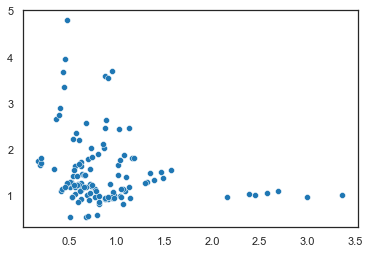

In [144]:
a = ab.apply(lambda a:a[0]).values
b = ab.apply(lambda a:a[1]).values
sns.scatterplot(a,b)

In [50]:

dt1 = dt[(dt.eps == "0.1") & (dt.r == 200)]
print(dt1.shape)
dt2 = dt1[(dt.P > 1.0)]

(664, 16)


/var/folders/gc/vwr0wlvs149fjgmddd29dpw40000gn/T/ipykernel_7325/157712764.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dt2 = dt1[(dt.P > 1.0)]


In [41]:
dt2.iloc[dt2.P.argmax()]

level_0                                                     207
index                                                      4166
modelFile          random_mc2_n5_mid3_d1000_05_mr098_r10_57.uai
r                                                           200
P                                1358596610832987487138217984.0
duplicate                                                  True
fix                                                        True
pnss          [0.0090422833643779, 0.0018701783168612, 0.002...
Punif                                                       1.0
pns098        [0.0090422833643779, 0.0018701783168612, 0.002...
pns_l_emcc                                                  0.0
pns_u_emcc                                             0.201985
pns_l_ccve                                                  NaN
pns_u_ccve                                                  NaN
eps                                                         0.1
Name: 207, dtype: object

In [31]:
from scipy.stats.distributions import beta 
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)


NameError: name 'a' is not defined

/Users/dhuber/anaconda3/envs/causal/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

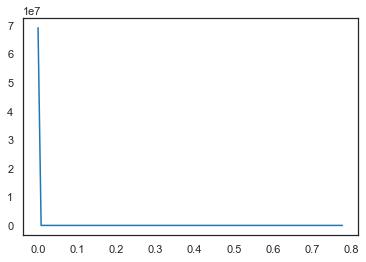

In [87]:
sns.lineplot(x, beta.pdf(x, a, b))

In [15]:
dt = dt[dt.P <= 1.0]
dt["eps dup"] = dt["eps"].astype(str) + " " + dt["duplicate"].astype(str)

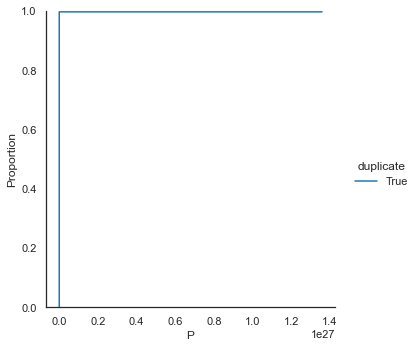

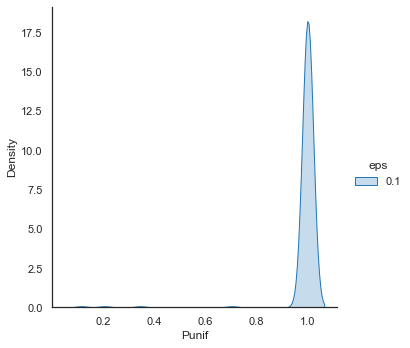

In [32]:
sns.set_theme(style="white", palette="tab10")
sns.displot(dt[dt.eps == "0.1"], x="P", hue="duplicate", kind="ecdf")
sns.displot(dt, x="Punif", hue="eps", kind="kde", fill=True)

# S1B duplicate exploration

In [20]:
d1d = load("P_kl_1e8_s1b_100iter_duplicated_0.01.pickle", 0.01)
d3d = load("P_kl_1e8_s1b_100iter_duplicated_0.1.pickle", 0.1)
dtd = pd.concat((d1d,d3d)).reset_index()
d3d['dup'] = True

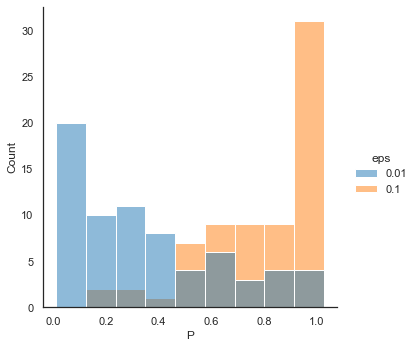

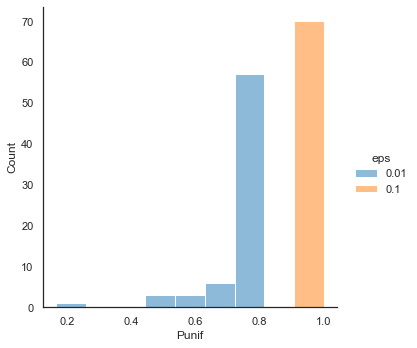

In [15]:
sns.set_theme(style="white", palette="tab10")
sns.displot(dtd, x="P", hue="eps",   fill=True)
sns.displot(dtd, x="Punif", hue="eps", fill=True)

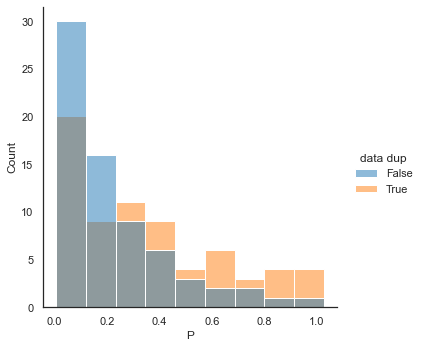

In [24]:
d1['data dup']=False
d1d['data dup']=True
sns.displot(pd.concat((d1, d1d)).reset_index(), x="P", hue="data dup")


# S1D exploration (no dup)

In [28]:
f1 = load("P_kl_1e8_s1d_100iter_0.01.pickle", 0.01)
f2 = load("P_kl_1e8_s1d_100iter_0.05.pickle", 0.05)
f3 = load("P_kl_1e8_s1d_100iter_0.1.pickle", 0.1)

ft = pd.concat((f1,f2,f3)).reset_index()
#dt = d1.merge(d2[["modelFile", "P0.05"]], on="modelFile").merge(d3[["modelFile", "P0.1"]], on="modelFile")

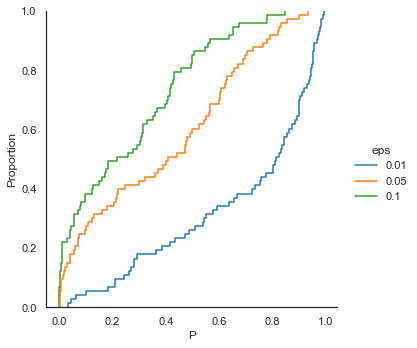

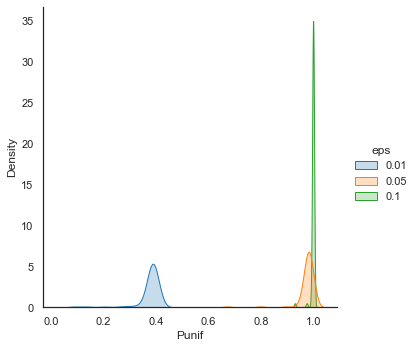

In [58]:
sns.set_theme(style="white", palette="tab10")
sns.displot(ft, x="P", hue="eps", kind="ecdf")
sns.displot(ft, x="Punif", hue="eps", kind="kde", fill=True)

<AxesSubplot:xlabel='r', ylabel='P'>

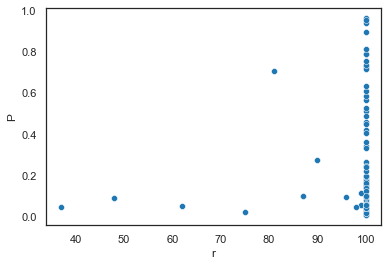

In [30]:
sns.scatterplot(y = f1.P, x = f1.r)

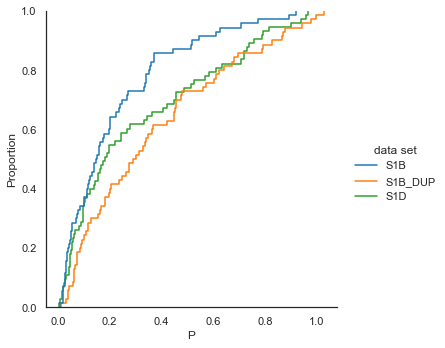

In [52]:
pltd = (d1, d1d, f1)
#pltd = (d3, d3d, f3)
pltd[0]['data set']="S1B"
pltd[1]['data set']="S1B_DUP"
pltd[2]['data set']="S1D"
sns.displot(pd.concat(pltd).reset_index(), x="P", kind="ecdf", hue="data set")


In [33]:
s = pd.read_pickle("pns_kl_1e8_s1d.pickle")
s = dt[(dt.eps=="0.1") & ( ~ dt.duplicate)].merge(s, on="modelFile")

/Users/dhuber/anaconda3/envs/causal/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pnss', ylabel='P'>

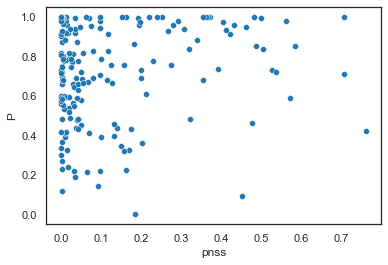

In [55]:
sns.scatterplot( s.pnss.apply(min),s.P)

# s1d 200 exploration

In [9]:
d_50 = pd.read_pickle("P50_0.1.pickle")
d_100 = pd.read_pickle("P100_0.1.pickle")
d_150 = pd.read_pickle("P150_0.1.pickle")
d_200 = pd.read_pickle("P200_0.1.pickle")


In [26]:
d_50["P_199_0.1"]


10      0.454124
20           NaN
38           NaN
47           NaN
83           NaN
          ...   
4996         NaN
5024         NaN
5057         NaN
5065         NaN
5074         NaN
Name: P_199_0.1, Length: 260, dtype: float64

In [11]:
d_50.pns098.apply(len)

10      199
20      131
38      200
47      200
83      200
       ... 
4996    200
5024    200
5057    139
5065     58
5074    200
Name: pns098, Length: 260, dtype: int64